# Neural Network

A neural network is created which can be used for training and testing on trips data.



In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [22]:
path_output=os.path.join(os.getcwd(), "..", "data", "output")

In [23]:
features = pd.read_csv(os.path.join(path_output, "Features.csv"))
features = features.drop("Unnamed: 0", axis=1)

### Neural Network

In [28]:
def train_neural_network(p_X_train_scaled, p_y_train, p_on):
    """Train Neural Network Model

    Train and save a Neural Network model.
    The network has the following properties:
        - three hidden layer
        - 50 epochs
        - activation function is relu
        - dimension of input and hidden layer is 36
        - dimension of output layer is 1
        - dropout is not used
    Then evaluate the error metrics by another method.

    Args:
        p_X_train_scaled (DataFrame):   Scaled X input of train set (matrix)
        p_y_train (Series):             y output to train on (vector)
    Returns:
        nn_regression_sets (array): true y values and predicted y values for train and validation set
    """
    # create a validation set which is 20% of the whole dataset. Therefore use formula to receive ca. 0.2857.
    X_train, X_val, y_train, y_val = train_test_split(p_X_train_scaled, p_y_train, random_state=42, test_size=0.2 / 0.7)
    neural_network = keras.Sequential(
        [layers.Dense(36, activation="relu", input_shape=[p_X_train_scaled.shape[1]], kernel_initializer="random_normal"),
         # layers.Dropout(0.2),
         layers.Dense(36, activation="relu", kernel_initializer="random_normal"),
         layers.Dense(36, activation="relu", kernel_initializer="random_normal"),
         layers.Dense(36, activation="relu", kernel_initializer="random_normal"),
         layers.Dense(36, activation="relu", kernel_initializer="random_normal"),
         layers.Dense(36, activation="relu", kernel_initializer="random_normal"),
         # layers.Dense(36, activation="relu", kernel_initializer="random_normal"),
         # layers.Dense(36, activation="relu", kernel_initializer="random_normal"),
         # layers.Dense(36, activation="softmax"),
         # layers.Dense(36, activation="softmax"),
         # layers.Dropout(0.2),
         layers.Dense(1)])
    optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
    neural_network.compile(loss="mse",
                           optimizer=optimizer,
                           metrics=["mae", "mse"])
    epochs = 20
    # create a validation set which is 20% of the whole dataset. Therefore use formula to receive ca. 0.2857.
    history = neural_network.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))
    neural_network.save(os.path.join(path_output, "models", "Neural_Network_Regression_Model_"+p_on))
    y_prediction_train = neural_network.predict(X_train)
    y_prediction_val = neural_network.predict(X_val)
    plot_train_loss(history, p_on=p_on)
    nn_regression_sets = [y_train, y_val, y_prediction_train, y_prediction_val]
    return nn_regression_sets

### Loss visualization by epoch

In [29]:
def plot_train_loss(p_history, p_on):
    """Plot the train and validation loss of Neural Network.

    Args:
        p_history (Object): History of loss during training of neural network
        p_weather (str):    Add Info, whether weather data is used
    Returns:
        No return
    """
    # Plotting the training and validation loss
    loss = p_history.history["loss"]
    val_loss = p_history.history["val_loss"]

    epochs = range(1, len(loss) + 1)
    fig, ax = plt.subplots(figsize=(16, 8), dpi=300)
    ax.plot(epochs, loss, "bo", label="Training loss")
    ax.plot(epochs, val_loss, "b", label="Validation loss")
    ax.set_title("Training and validation loss", fontsize=18)
    ax.set_xlabel("Epochs", fontsize=16)
    ax.set_ylabel("Loss", fontsize=16)
    plt.legend()
    plt.show()
    fig.savefig(os.path.join(path_output, "NN_error_per_epoch_"+p_on+".png"))
    plt.close(fig)

### Run NN

In [30]:
def train_NN(p_on="24_sum"):

    print("Split Data...")
    features_X = features.drop(["24_sum", "6_sum", "2_sum", "1_sum"], axis=1)
    features_y = features[p_on]
    X_train, X_test, y_train, y_test = train_test_split(features_X, features_y, random_state=42, test_size=0.3)

    print("Scale Data...")
    with open(os.path.join(path_output, "models", "Standard_Scaler.pkl"), "rb") as f:
        standard_scaler = pickle.load(f)
    X_train_scaled = standard_scaler.transform(X_train)

    print("PCA Data...")
    with open(os.path.join(path_output, "models", "PCA.pkl"), "rb") as f:
        pca = pickle.load(f)
    X_train_transformed = pca.transform(X_train_scaled)

    print("Train NN...")
    nn_regression_sets = train_neural_network(X_train_transformed, y_train.to_numpy(), p_on=p_on)

Split Data...
Scale Data...
PCA Data...
Train NN...
Train on 283719 samples, validate on 113488 samples
Epoch 1/20
283719/283719 [==============================] - 63s 221us/sample - loss: 405074.7715 - mae: 347.7198 - mse: 405074.4375 - val_loss: 180199.4736 - val_mae: 253.1241 - val_mse: 180199.4531
Epoch 2/20
283719/283719 [==============================] - 69s 244us/sample - loss: 138337.7979 - mae: 223.5723 - mse: 138337.4375 - val_loss: 112977.2869 - val_mae: 204.8408 - val_mse: 112977.2891
Epoch 3/20
283719/283719 [==============================] - 69s 244us/sample - loss: 92366.4889 - mae: 187.1153 - mse: 92366.7891 - val_loss: 83279.4058 - val_mae: 171.6553 - val_mse: 83279.4922
Epoch 4/20
283719/283719 [==============================] - 70s 245us/sample - loss: 69392.1197 - mae: 161.1575 - mse: 69392.1406 - val_loss: 58458.6983 - val_mae: 148.1094 - val_mse: 58458.7070
Epoch 5/20
283719/283719 [==============================] - 52s 182us/sample - loss: 53968.5115 - mae: 142.4

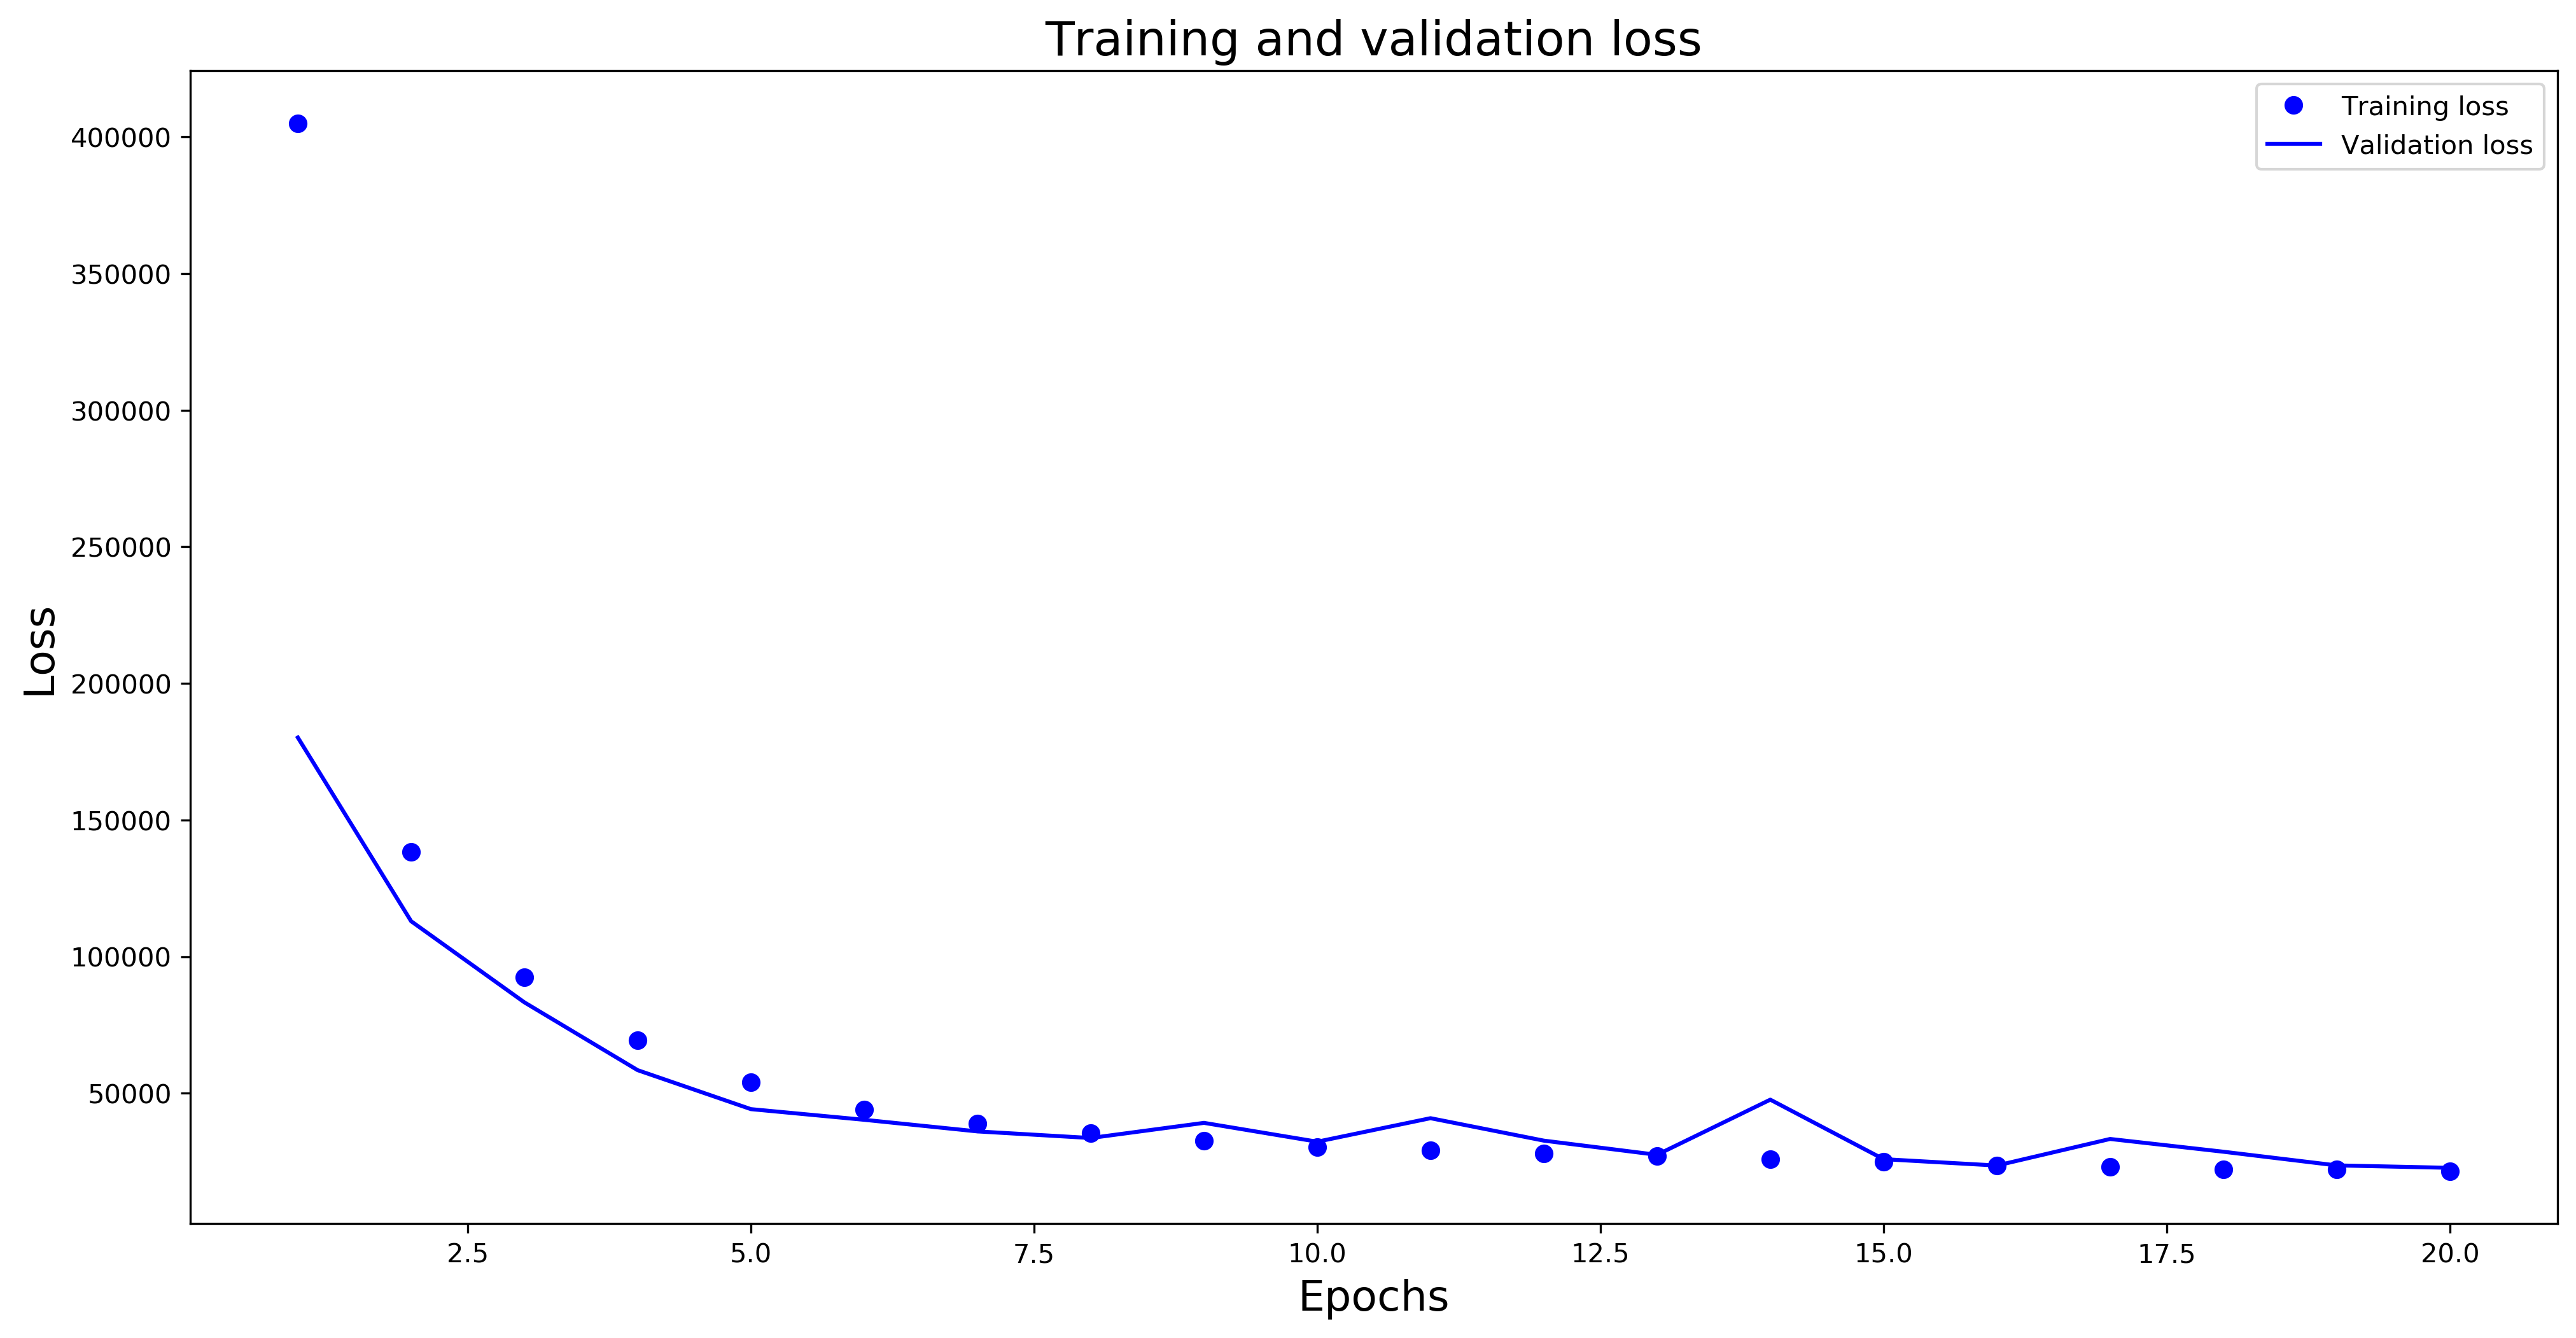

In [31]:
train_NN(p_on="6_sum")
#"24_sum", "6_sum", "2_sum", "1_sum"